## Распознавание образов

## Лабораторная работа № 4

## Выполнил студент группы М19-ИВТ-3

## Суворкин Павел

## 10.12.2020

Задание Есть белое полотно размером NxM. Нужно поместить на это полотно одну из чёрно-белых картинок эталонов
(для простоты можно поместить буквы своих инициалов и цифры своей даты рождения) размером n x m.
После этого нужно нанести шум (соль-перец(ч/б точки) при разных вероятностях и синусоида с регулируемым периодом).

Надо обнаружить на зашумлённой картинке объект и его распознать, прогнав по эталонной базе.


1) сгенерированный символ

2) Обнаружился или нет

3) Результат распознавания

4) тип шума с указанием вероятности/периода

(30, 100, 3)


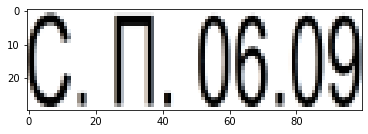

In [1]:
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
import numpy as np

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

m = 300 # размер
n = 100 # размер
scale = 25 # масштаб картинок
rgb = 255 #цвет исходной картинки

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------

# изображение имени

img_path ='C:/Users/Suvor/Desktop/lab 4/Name.png'
imageS = cv2.cvtColor(cv2.imread(cv2.os.path.join(img_path)), cv2.COLOR_BGR2RGB) 
imshow(imageS)
print(imageS.shape)

In [2]:
# функция визуализации (отрисовка бокса)
# функция поиска
# импульсная помеха
#синусоидальная помеха
def vizual(image, sX, sY):
  print(sX)
  print(X)
  print(sY)
  print(Y)
  print("Визуализация")
  return cv2.rectangle(image, (sY, sX), (sY + imageS.shape[1], sX + imageS.shape[0]), (0, 255, 255), 1)

def poisk(image):
  print("Начать поиск")
  max = 0
  termMap = np.empty((n-imageS.shape[0], m-imageS.shape[1])) # тепловая карта
  myMean = np.mean(image)
  for aa in range(image.shape[0]-imageS.shape[0]):
        for bb in range(image.shape[1]-imageS.shape[1]):
          sum = 0
          for ff in range(imageS.shape[0]-1):
            for tt in range(imageS.shape[1]-1):
              if ((int(image[aa+ff][bb+tt][0]) - int(imageS[ff][tt][0])) < myMean/2):
                sum = sum + 1
          if (max < sum):
            max = sum
            sX = aa
            sY = bb
          termMap[aa][bb] = sum
  print("Поиск выполнен")
  return termMap, sX, sY

def impuls(img, p):
  print("Импульсная помеха")
  defollPix = img.shape[0] * img.shape[1] # всего пикселей 
  S0 = np.zeros(defollPix); # массив со значениями всех пикселей равным 0
  R = (defollPix  * p)  / 100 # процент заполненных пикселей
  
  for aa in range(int(R)):
    S0[aa] = 1;
# если при переборе нашли 1 то шумим если нет- нет
# всегда удаляем 1 элемент при проходе
  random.shuffle(S0)
  tmp = 0
  for aa in range(img.shape[0]):
      for bb in range(img.shape[1]):
        if (S0[tmp] == 1):
          img[aa][bb][0] = 0
          img[aa][bb][1] = 0
          img[aa][bb][2] = 0
        tmp = tmp + 1
  print(str(p) + " процентов это " + str(int(R)) + " пикселей из " + str(defollPix))
  print("Импульс выполнен")
  return img

def sinus(img, kolVol, yarkost):
  print("Выполнить синус")
  # генерация от -255 до +255
  # k = 1 # к-во волн
  # f = 1 # яркость
  r = img.shape[0] # разрешение изображения
  x = np.arange(0, 6.28 * kolVol, (6.28 * kolVol) / r)
  y = np.copy(x)
  for aa in range(len(x)):
    y[aa] = round((0 + (np.sin(x[aa]) * 255)) * yarkost)
  for aa in range(img.shape[0]):
        for bb in range(img.shape[1]):
          t = (img[aa][bb][0] + y[aa]).astype(np.uint8)
          if ((img[aa][bb][0] + y[aa]) < 0):
            t=0
          if ((img[aa][bb][0] + y[aa])> 255 ):
            t=255
          img[aa][bb][0] = t
          img[aa][bb][1] = t
          img[aa][bb][2] = t
  return img.astype(np.uint8)

In [3]:
# заполнение картинки цветом (та, на которой ведем поиск)
image = np.empty((n, m, 3))
for aa in range(image.shape[0]):
      for bb in range(image.shape[1]):
        image[aa][bb][0] = int(rgb)
        image[aa][bb][1] = int(rgb)
        image[aa][bb][2] = int(rgb)
print(image.shape)

(100, 300, 3)


17
180
(100, 300, 3)


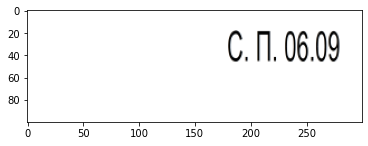

In [4]:
# случайно располагаем изображение
import random
X = random.randint(0,n-imageS.shape[0])
Y = random.randint(0,m-imageS.shape[1])
print(X) #по X
print(Y) #по Y
#  расположить на картинке
for aa in range(imageS.shape[0]):
      for bb in range(imageS.shape[1]):
        image[X + aa][Y + bb][0] = imageS[aa][bb][0]
        image[X + aa][Y + bb][1] = imageS[aa][bb][1]
        image[X + aa][Y + bb][2] = imageS[aa][bb][2]
print(image.shape)
# исходная картинка
imshow(np.uint8(image))

Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


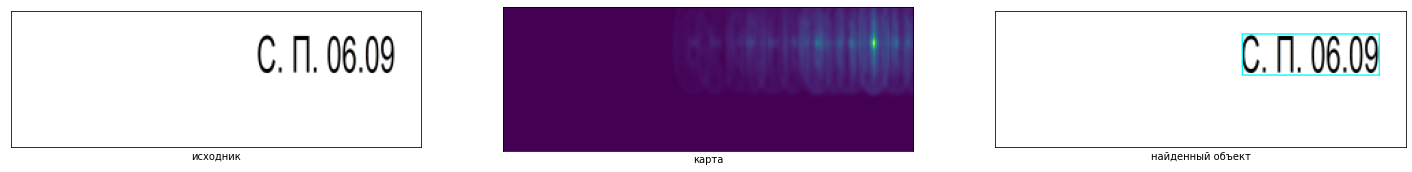

In [5]:
# общий тест для картинки нормальное изображение тест алгоритма нахождения
test = np.copy(image)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
5 процентов это 1500 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


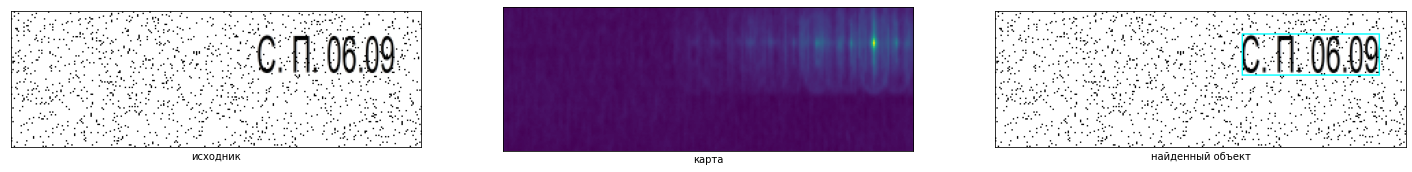

In [6]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 5)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
20 процентов это 6000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


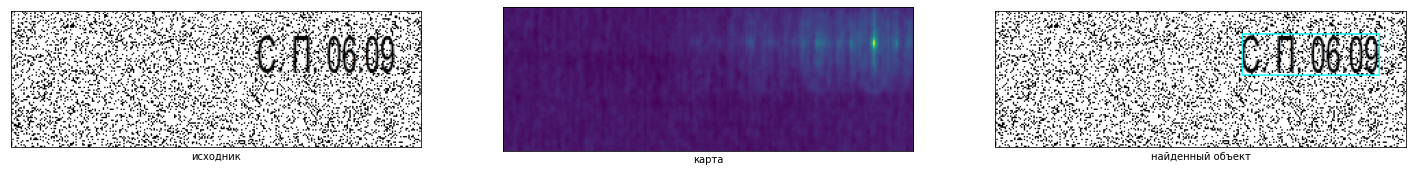

In [7]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 20)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
30 процентов это 9000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


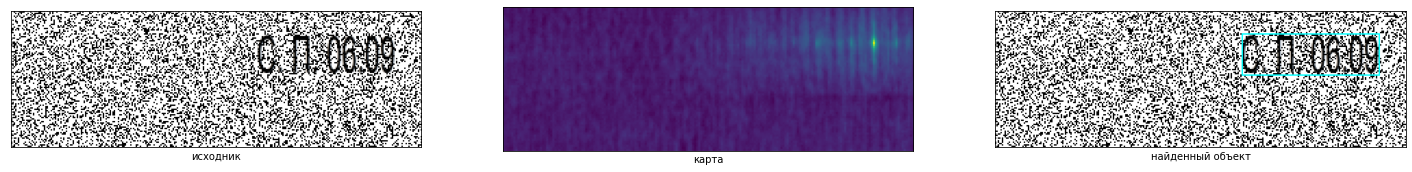

In [8]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 30)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
40 процентов это 12000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


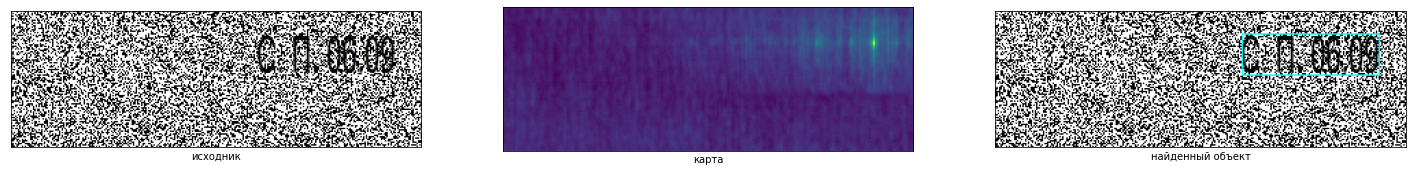

In [9]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 40)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
50 процентов это 15000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


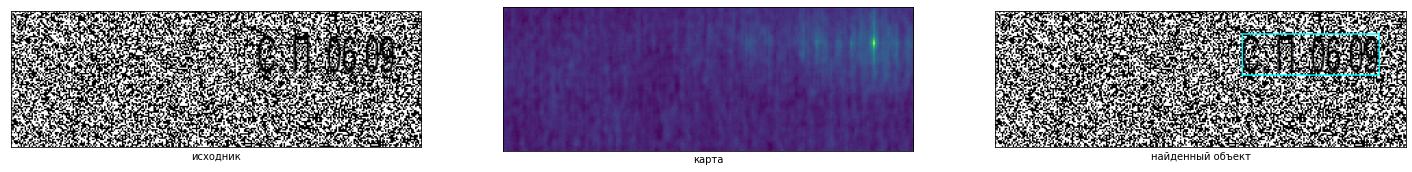

In [10]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 50)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
60 процентов это 18000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


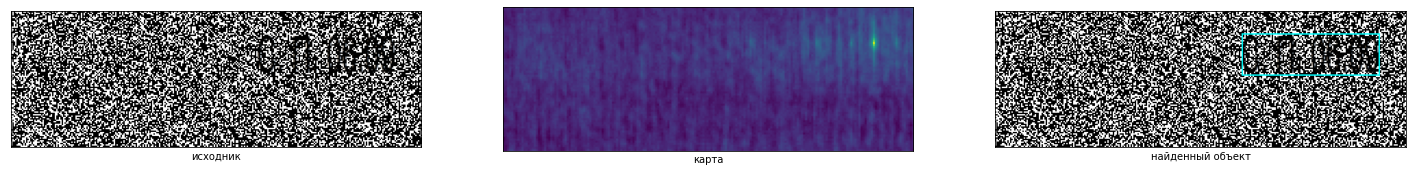

In [11]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 60)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
70 процентов это 21000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


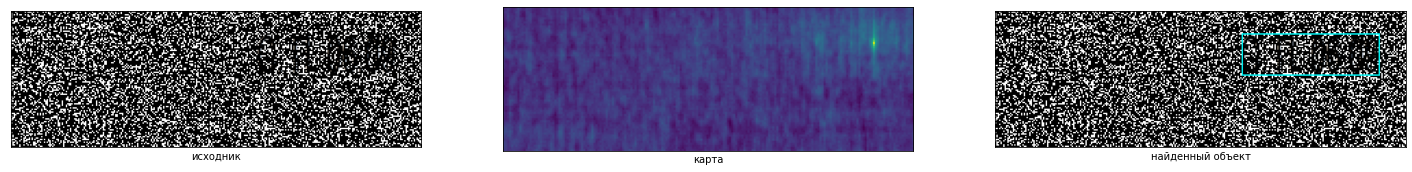

In [12]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 70)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
80 процентов это 24000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


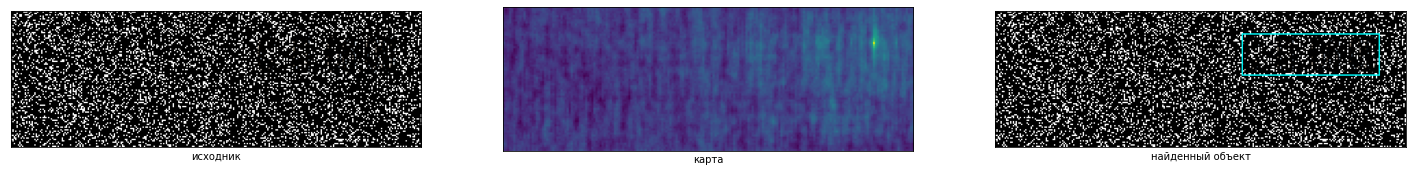

In [13]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 80)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
90 процентов это 27000 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


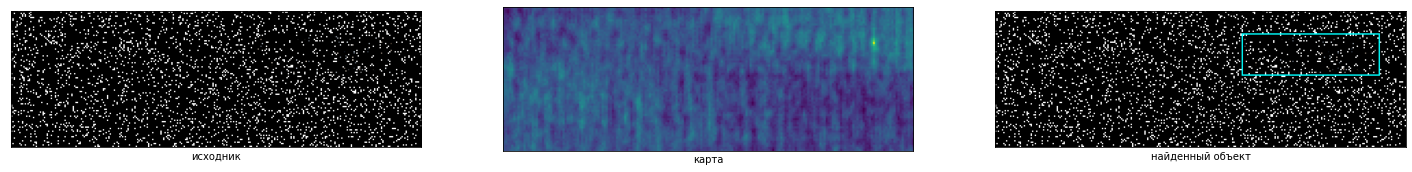

In [14]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 90)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
95 процентов это 28500 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


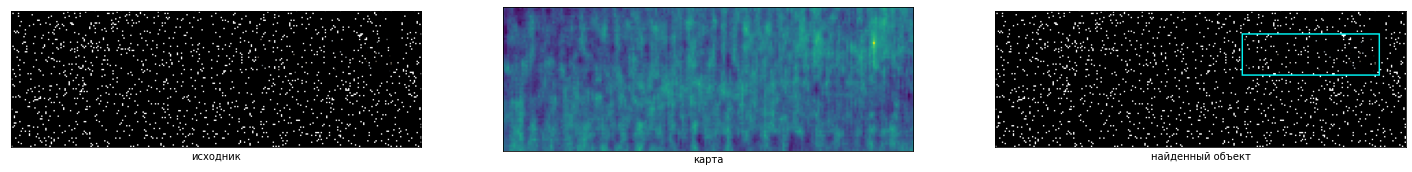

In [15]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 95)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Импульсная помеха
98 процентов это 29400 пикселей из 30000
Импульс выполнен
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


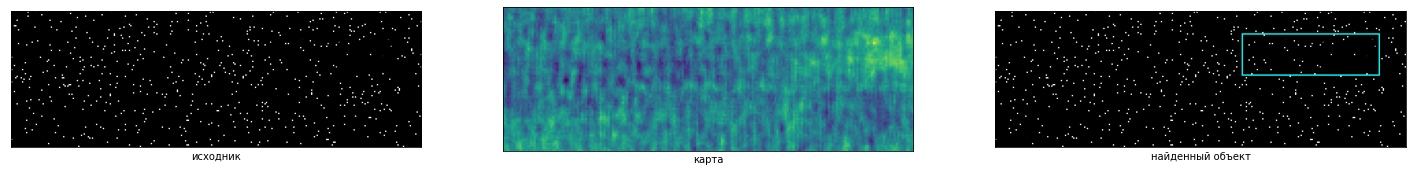

In [16]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = impuls(test, 98)
name = ['исходник','карта','найденный объект']
temp, sX, sY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, sX, sY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


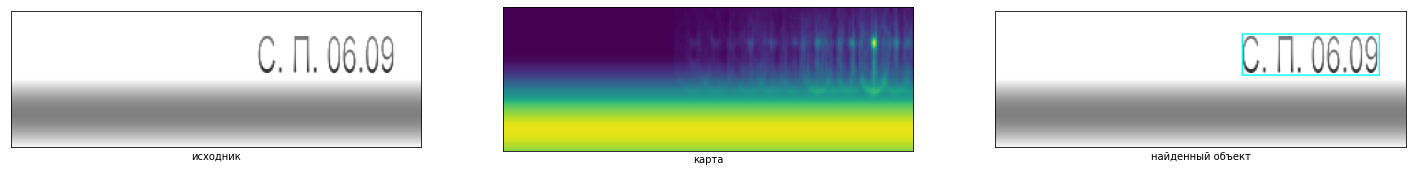

In [17]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 1, 0.5)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
60
17
0
180
Визуализация


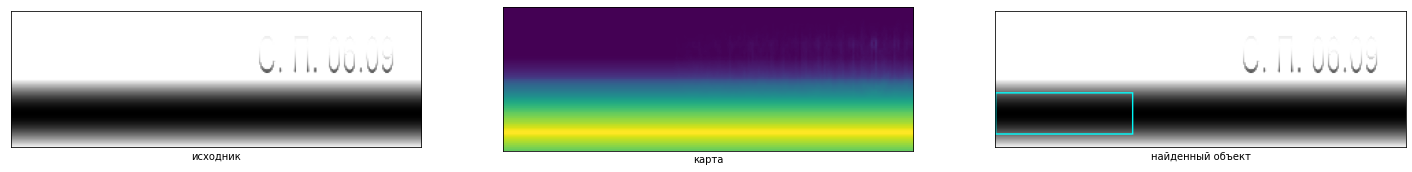

In [18]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 1, 1)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


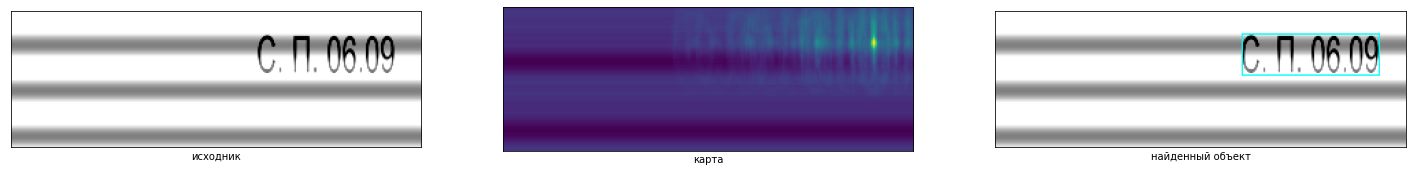

In [19]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 3, 0.5)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


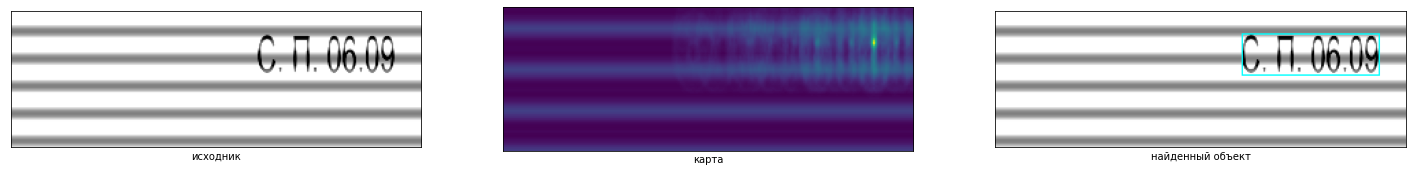

In [20]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 5, 0.5)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


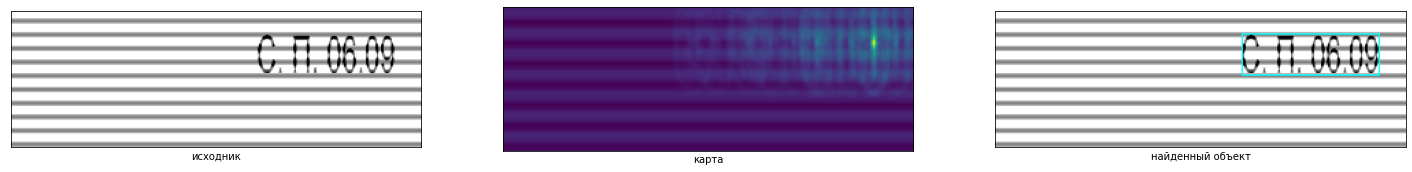

In [21]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 10, 0.5)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
17
17
180
180
Визуализация


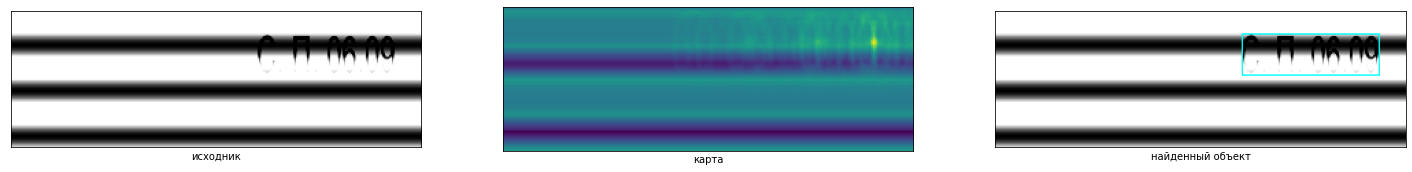

In [22]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 3, 1)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
10
17
180
180
Визуализация


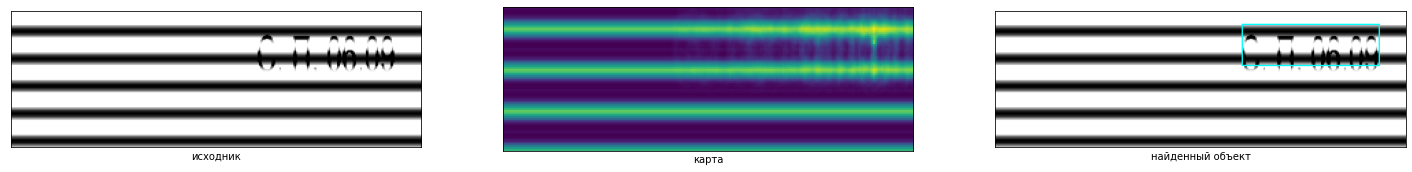

In [23]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 5, 1)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

Выполнить синус
Начать поиск
Поиск выполнен
14
17
180
180
Визуализация


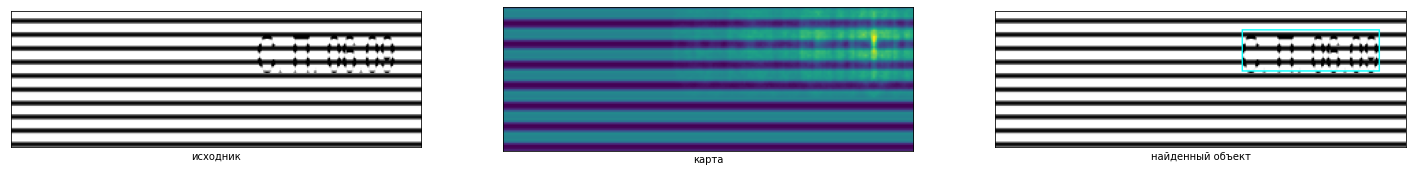

In [24]:
# общий тест для картинки зашумлённое изображение тест алгоритма нахождения
test = np.copy(image)
test = sinus(test, 10, 1)
name = ['исходник','карта','найденный объект']
temp, kX, kY = poisk(test)
data = [test.astype(np.uint8), temp, vizual(test, kX, kY).astype(np.uint8)]
plt.figure(figsize=(scale,scale))
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(data[i])
    plt.xlabel(name[i])
plt.show()

(20, 10, 3)


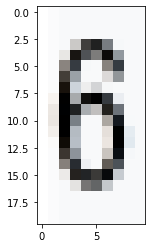

In [106]:
img_path = 'C:/Users/Suvor/Desktop/lab 4/6.png'
imageS = cv2.cvtColor(cv2.imread(cv2.os.path.join(img_path)), cv2.COLOR_BGR2RGB)
imshow(imageS)
print(imageS.shape)

In [107]:
# заполнение картинки цветом (та, на которой ведем поиск)
image = np.empty((n, m, 3))
for aa in range(image.shape[0]):
      for bb in range(image.shape[1]):
        image[aa][bb][0] = int(rgb)
        image[aa][bb][1] = int(rgb)
        image[aa][bb][2] = int(rgb)
print(image.shape)

(100, 300, 3)


3
103
(100, 300, 3)


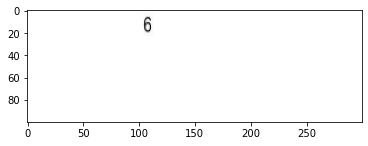

In [108]:
# случайно располагаем изображение
import random
X = random.randint(0,n-imageS.shape[0])
Y = random.randint(0,m-imageS.shape[1])
print(X) #по X
print(Y) #по Y
#  расположить на картинке
for aa in range(imageS.shape[0]):
      for bb in range(imageS.shape[1]):
        image[X + aa][Y + bb][0] = imageS[aa][bb][0]
        image[X + aa][Y + bb][1] = imageS[aa][bb][1]
        image[X + aa][Y + bb][2] = imageS[aa][bb][2]
print(image.shape)
# исходная картинка
imshow(np.uint8(image))

In [109]:
# нахождение и классификация найденного
def poiskIRaspozn(image, sim):
  print("Начать поиск")
  SI = 5
  newMax = 0
  for i in range(len(sim)-1):
    max = 0
    termMap = np.empty((n-sim[i].shape[0], m-sim[i].shape[1])) # тепловая карта
    savedMap = np.copy(termMap)
    myMean = np.mean(sim[i])
    for aa in range(image.shape[0]-sim[i].shape[0]):
          for bb in range(image.shape[1]-sim[i].shape[1]):
            sum = 0
            for ff in range(sim[i].shape[0]-1):
              for tt in range(sim[i].shape[1]-1):
                if ((int(image[aa+ff][bb+tt][0]) - int(sim[i][ff][tt][0])) < myMean/2):
                  sum = sum + 1
            if (max < sum):
              max = sum
              sX = aa
              sY = bb
            termMap[aa][bb] = sum
    if (newMax < max):
      newMax = max
      SI = i
      savedMap = np.copy(termMap)
  print("Поиск выполнен")
  return savedMap, sX, sY, SI

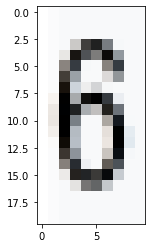

In [145]:
six = cv2.cvtColor(cv2.imread(cv2.os.path.join("C:/Users/Suvor/Desktop/lab 4/6.png")), cv2.COLOR_BGR2RGB)
seven = cv2.cvtColor(cv2.imread(cv2.os.path.join("C:/Users/Suvor/Desktop/lab 4/7.png")), cv2.COLOR_BGR2RGB)
eight = cv2.cvtColor(cv2.imread(cv2.os.path.join("C:/Users/Suvor/Desktop/lab 4/8.png")), cv2.COLOR_BGR2RGB)
nine = cv2.cvtColor(cv2.imread(cv2.os.path.join("C:/Users/Suvor/Desktop/lab 4/9.png")), cv2.COLOR_BGR2RGB)
imshow(six)

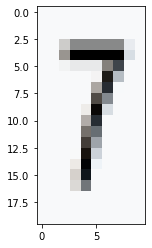

In [142]:
imshow(seven)

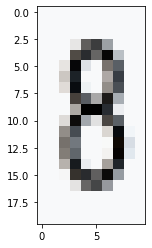

In [143]:
imshow(eight)

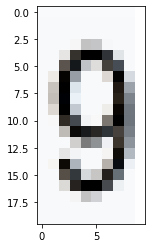

In [144]:
imshow(nine)

In [110]:
sim = [six, seven, eight, nine]
savedMap, sX, sY, SI = poiskIRaspozn_1(image, sim)

Начать поиск
Поиск выполнен


3
103
0


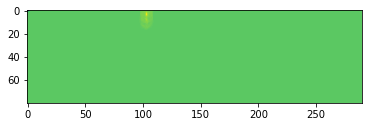

In [111]:
print(sX)
print(sY)
print(SI)
imshow(np.uint8(savedMap))

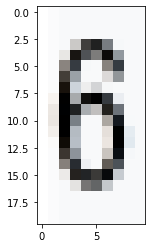

In [112]:
# показ найденного эталона из массива поиска
imshow(np.uint8(sim[SI]))

Импульсная помеха
30 процентов это 9000 пикселей из 30000
Импульс выполнен


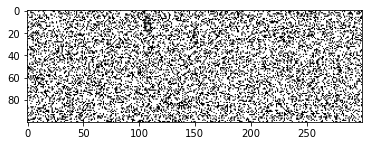

In [114]:
# шумная картинка с эталоном
test = np.copy(image)
test = impuls(test, 30)
imshow(np.uint8(test))

In [117]:
sim = [six, seven, eight, nine]
savedMap, sX, sY, SI = poiskIRaspozn(test, sim)

Начать поиск
Поиск выполнен


3
103
0


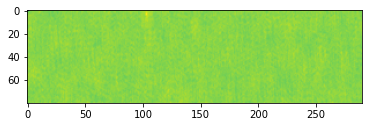

In [118]:
print(sX) # найденная координата по Х
print(sY) # координата по У
print(SI) # Номер картинки в массиве
imshow(np.uint8(savedMap)) # карта нахождения

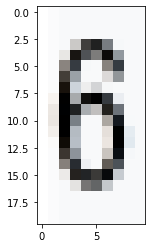

In [119]:
imshow(np.uint8(sim[SI])) # изображение эталон из массива

Выполнить синус


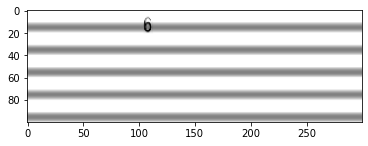

In [120]:
test = np.copy(image)
test = sinus(test, 5, 0.5)
imshow(np.uint8(test))

In [124]:
sim = [six, seven, eight, nine]
savedMap, sX, sY, SI = poiskIRaspozn(test, sim)

Начать поиск
Поиск выполнен


3
103
1


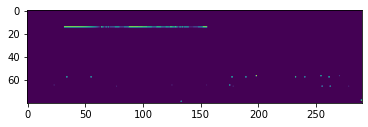

In [125]:
print(sX)
print(sY)
print(SI)
imshow(np.uint8(savedMap))

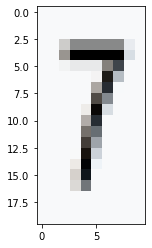

In [123]:
imshow(np.uint8(sim[SI]))